# Diabetes prediction using Supervised learning
The goal for this project is to build machine learning model using Supervised learning to accurately predict whether or not the patients in the dataset have diabetes or not.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

The dataset can be obtained from url below:<br>
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

# 1. Importing libraries

In [167]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib in line

# 2. Importing data and EDA

In [168]:
df = pd.read_csv('data/diabetes.csv')
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Let's check if the dataset is balanced with respect to the response column 'Outcome'.

In [170]:
print('Non-diabetic:',len(df[df.Outcome==0]))
print('Diabetic:',len(df[df.Outcome==1]))

print('Percent non-diabetes: ', len(df[df.Outcome==0])*100/len(df))
print('Percent diabetes: ', len(df[df.Outcome==1])*100/len(df))

Non-diabetic: 500
Diabetic: 268
Percent non-diabetes:  65.10416666666667
Percent diabetes:  34.895833333333336


### 2.1 Check correlations

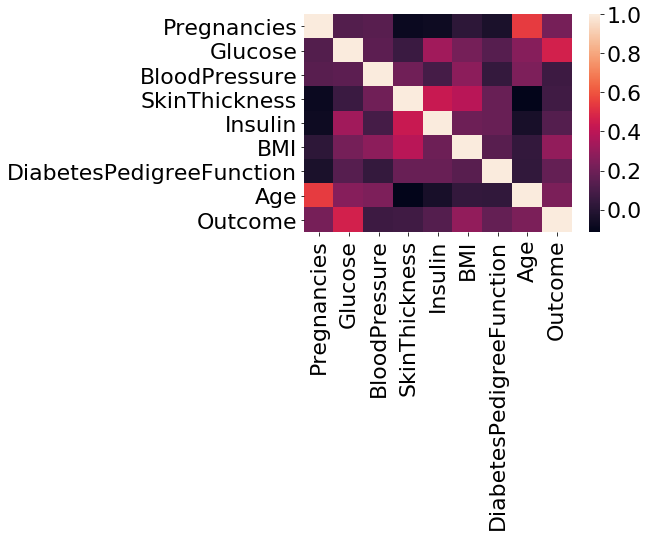

In [171]:
sns.heatmap(df.corr())

In [172]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

<b>'Glucose'</b> feature is highly correlated to the Outcome as it has the value of 0.46. Next correlated in the order are BMI, Age, Pregnancies, DiabetesPedigreeFunction, Insulin. This information can be used for feature selection, for now we will use all the features when building the model. Let us also try to visualize how these features are affecting the people with and without diabetes using histograms.

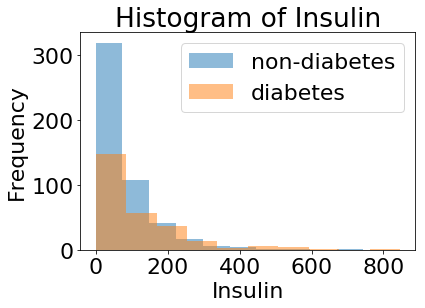

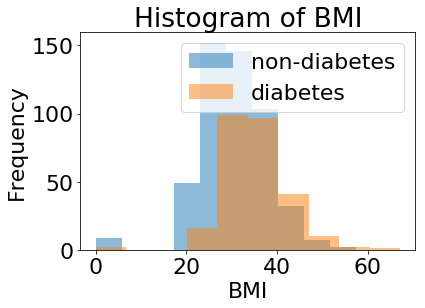

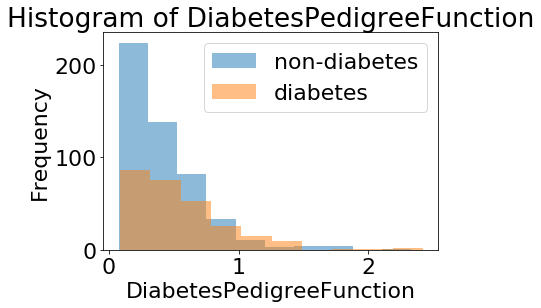

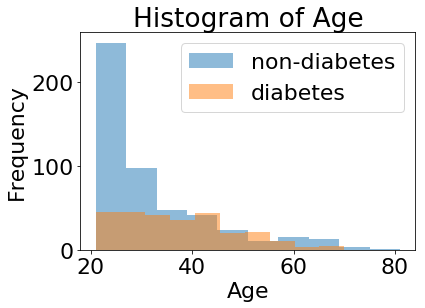

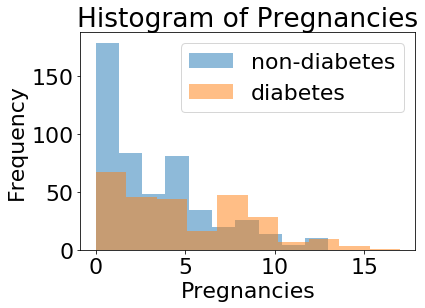

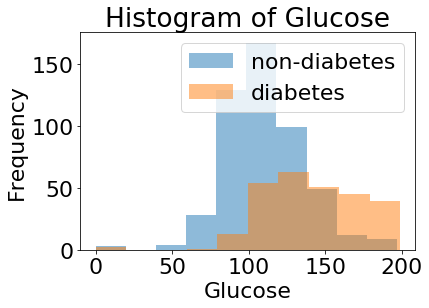

In [173]:
for col in ['Insulin','BMI','DiabetesPedigreeFunction','Age', 'Pregnancies','Glucose']:
    plt.hist(df[df['Outcome']==0][col], 10, alpha=0.5, label='non-diabetes')
    plt.hist(df[df['Outcome']==1][col], 10, alpha=0.5, label='diabetes')
    plt.legend(loc='upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(col))
    plt.show()

Not surprisingly if we look at histogram of Glucose we see there is a large increase in Glucose level of people who will eventually develop diabetes.


### 2.2 Check missing values and imputation

In [174]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There doesn't seem to be any missing data, but let's check the statistics of columns as well.

In [175]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


On seeing the above statistics we can see 5 columns - 'Glucose','Insulin','BMI','BloodPressure','SkinThickness' with 
minimum value of 0 which doesn't make sense and means those values could be missing, let's check how many rows are 
missing values per column.

In [176]:
# replace 0's with None
columns_missing = ['Glucose','Insulin','BMI','BloodPressure','SkinThickness']
for col in columns_missing:
    df[col].replace([0], [None], inplace=True)
    
# check again
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

As we can see some of the columns like Insulin and SkinThickness have a lot of rows with missing columns and we can't simply drop those rows so instead we will impute those rows with mean values for their columns.

In [177]:
imputer = Imputer(strategy='mean')
outcome = df['Outcome']
df = df.drop(['Outcome'], axis = 1)
df_imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(df_imputed, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
df_imputed.head()

D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0


### 2.3 Feature normalization
Now let's look at the distribution of features:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012DA8B34898>,
      dtype=object)

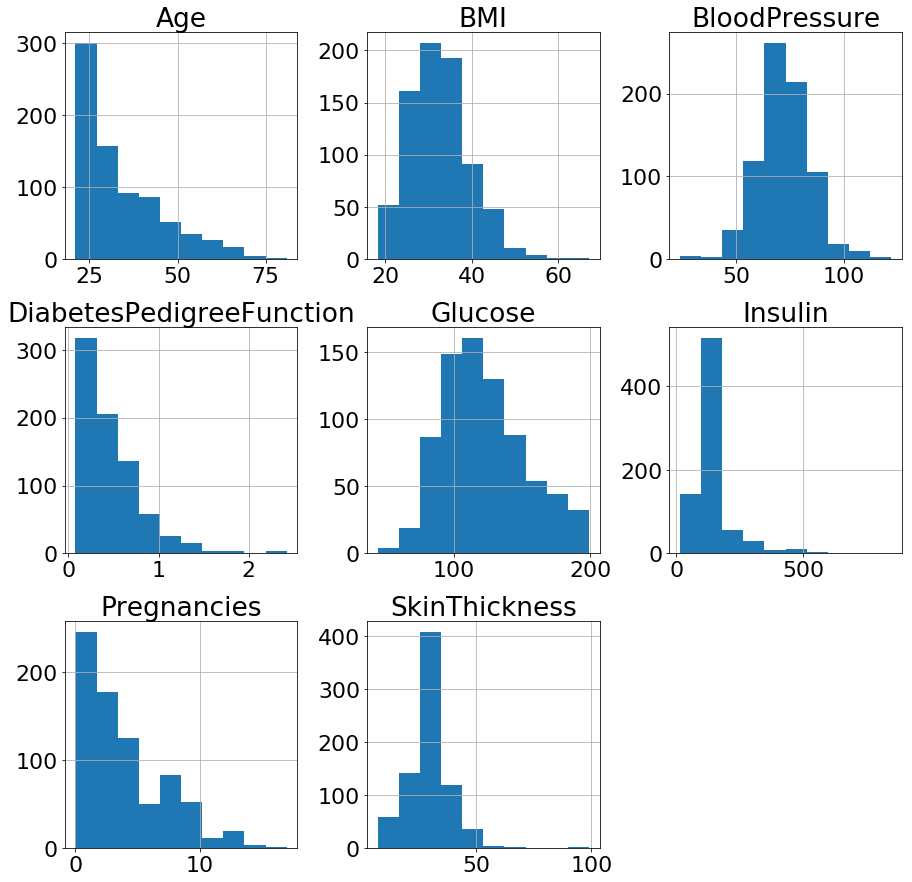

In [178]:
df_imputed.hist(figsize=(15,15))

We can see that the features are skewed with different min, max, mean and deviation values and as we know some machine algorithms may not learn properly with such data so it's important to normalize and scale them.

In [179]:
scale = StandardScaler()
df_imputed_scaled = pd.DataFrame(scale.fit_transform(df_imputed), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
df_imputed_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


# 3. Model training (Supervised learning)

In [180]:
# import classifiers for supervised training
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

y_train = outcome
X_train = df_imputed_scaled

#X_train = df[['Glucose','Insulin','BMI','DiabetesPedigreeFunction','Age', 'Pregnancies']]

# cross-validation
N_FOLDS = 5

models = [('LR', LogisticRegression()),
           ('SGD', SGDClassifier()),
           ('Ridge', RidgeClassifier()), 
           ('SVM rbf', SVC()),
           ('SVM linear', SVC(kernel='linear')),       
           ('RandomForest', RandomForestClassifier(n_estimators=200)), 
           ('KNN', KNeighborsClassifier(n_neighbors=2)),
           ('AdaBoost', AdaBoostClassifier(n_estimators=200)),
           ('GradientBoost', GradientBoostingClassifier(n_estimators=200))]

for (model_name, model) in models:
    
    # perform cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=N_FOLDS)
    print('Running model: ' + model_name + ', mean accuracy: %.5f +/- %.5f' % (np.mean(scores), np.std(scores)))

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages

Running model: LR, mean accuracy: 0.77347 +/- 0.01774
Running model: SGD, mean accuracy: 0.72529 +/- 0.03357
Running model: Ridge, mean accuracy: 0.77087 +/- 0.01563
Running model: SVM rbf, mean accuracy: 0.75136 +/- 0.02318
Running model: SVM linear, mean accuracy: 0.76696 +/- 0.01912
Running model: RandomForest, mean accuracy: 0.75658 +/- 0.03795
Running model: KNN, mean accuracy: 0.72138 +/- 0.03603
Running model: AdaBoost, mean accuracy: 0.75523 +/- 0.02758
Running model: GradientBoost, mean accuracy: 0.76307 +/- 0.02893


## 3.1 AUC metric and ROC Curves
For classification problems, it's important to use AUC metric so we will calculate that for some of the estimators:

LR test set accuracy:  0.7532467532467533


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


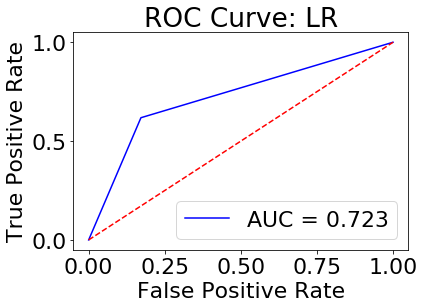

SVC test set accuracy:  0.7532467532467533


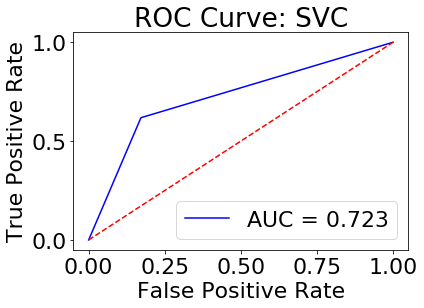

RidgeClassifier test set accuracy:  0.7727272727272727


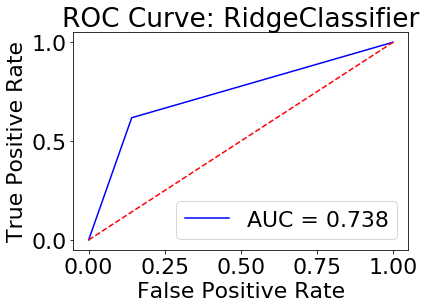

GradientBoostingClassifier test set accuracy:  0.7467532467532467


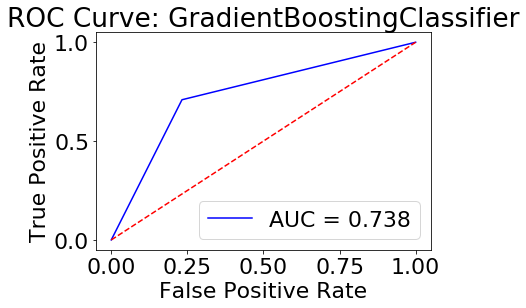

In [181]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random

random.seed(10)

x_train_subset, x_test_subset, y_train_subset, y_test_subset = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

lr = LogisticRegression().fit(x_train_subset, y_train_subset)
y_pred = lr.predict(x_test_subset)
fpr, tpr, threshold = roc_curve(y_test_subset, y_pred)
#fpr, tpr, threshold = roc_curve(y_test_subset, y_pred[:,1])
#roc_auc = metrics.auc(fpr, tpr)

print('LR test set accuracy: ', accuracy_score(y_test_subset, y_pred))
roc_auc = roc_auc_score(y_test_subset, y_pred)

plt.title('ROC Curve: LR')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

svc = SVC(kernel='linear').fit(x_train_subset, y_train_subset)
y_pred = svc.predict(x_test_subset)
fpr, tpr, threshold = roc_curve(y_test_subset, y_pred)
#fpr, tpr, threshold = roc_curve(y_test_subset, y_pred[:,1])
#roc_auc = metrics.auc(fpr, tpr)
print('SVC test set accuracy: ', accuracy_score(y_test_subset, y_pred))
roc_auc = roc_auc_score(y_test_subset, y_pred)

plt.title('ROC Curve: SVC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


rc = RidgeClassifier().fit(x_train_subset, y_train_subset)
y_pred = rc.predict(x_test_subset)
fpr, tpr, threshold = roc_curve(y_test_subset, y_pred)
#fpr, tpr, threshold = roc_curve(y_test_subset, y_pred[:,1])
#roc_auc = metrics.auc(fpr, tpr)
print('RidgeClassifier test set accuracy: ', accuracy_score(y_test_subset, y_pred))
roc_auc = roc_auc_score(y_test_subset, y_pred)

plt.title('ROC Curve: RidgeClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


gb = GradientBoostingClassifier(n_estimators=200).fit(x_train_subset, y_train_subset)
y_pred = gb.predict(x_test_subset)
fpr, tpr, threshold = roc_curve(y_test_subset, y_pred)
#fpr, tpr, threshold = roc_curve(y_test_subset, y_pred[:,1])
#roc_auc = metrics.auc(fpr, tpr)
print('GradientBoostingClassifier test set accuracy: ', accuracy_score(y_test_subset, y_pred))
roc_auc = roc_auc_score(y_test_subset, y_pred)

plt.title('ROC Curve: GradientBoostingClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## 3.2 Neural Network model training

In [186]:
from tensorflow import keras 
from tensorflow.keras import layers
import random

random.seed(10)

model = keras.Sequential([
 #layers.Dense(15, activation="relu"),
 layers.Dense(10, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])
    

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

#history = model.fit(X_train, y_train,epochs=50, batch_size=64, validation_split=0.2)
history = model.fit(x_train_subset, y_train_subset,epochs=45, batch_size=64, validation_split=0.1)


Epoch 1/45
9/9 [==============================] - 1s 30ms/step - loss: 0.6373 - accuracy: 0.6289 - val_loss: 0.6672 - val_accuracy: 0.5323
Epoch 2/45
9/9 [==============================] - 0s 16ms/step - loss: 0.5921 - accuracy: 0.6752 - val_loss: 0.6560 - val_accuracy: 0.5645
Epoch 3/45
9/9 [==============================] - 0s 18ms/step - loss: 0.5913 - accuracy: 0.6731 - val_loss: 0.6461 - val_accuracy: 0.5806
Epoch 4/45
9/9 [==============================] - 0s 23ms/step - loss: 0.5802 - accuracy: 0.6902 - val_loss: 0.6370 - val_accuracy: 0.5806
Epoch 5/45
9/9 [==============================] - 0s 10ms/step - loss: 0.5517 - accuracy: 0.7120 - val_loss: 0.6288 - val_accuracy: 0.6129
Epoch 6/45
9/9 [==============================] - 0s 11ms/step - loss: 0.5687 - accuracy: 0.7163 - val_loss: 0.6212 - val_accuracy: 0.6290
Epoch 7/45
9/9 [==============================] - 0s 10ms/step - loss: 0.5373 - accuracy: 0.7314 - val_loss: 0.6138 - val_accuracy: 0.6452
Epoch 8/45
9/9 [===========

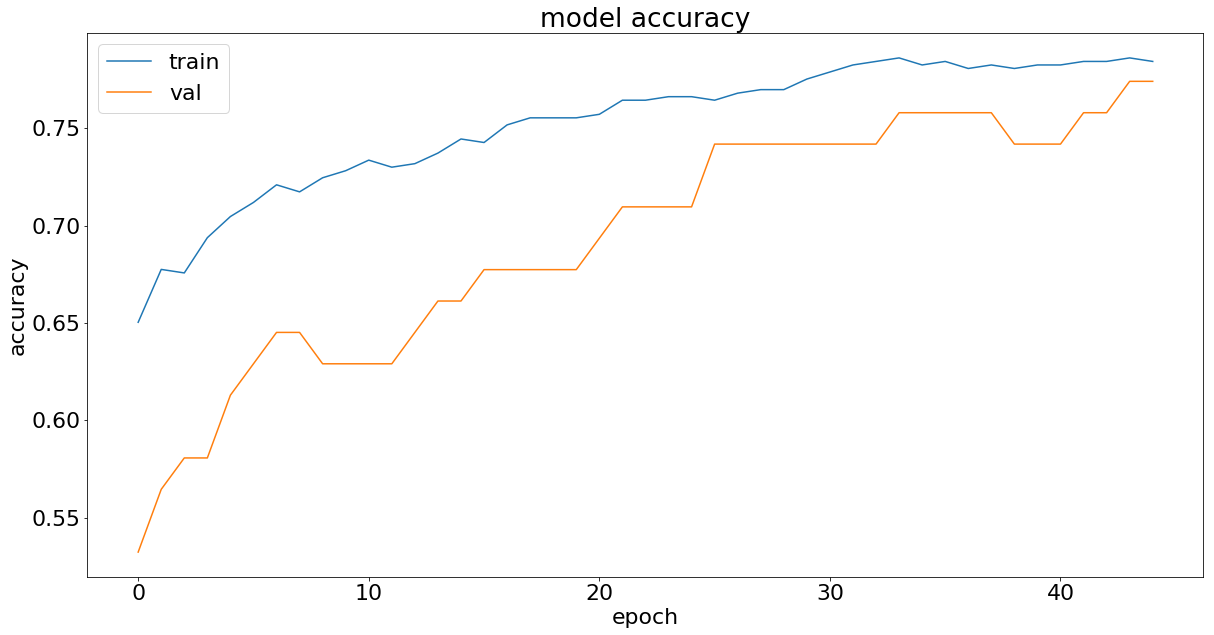

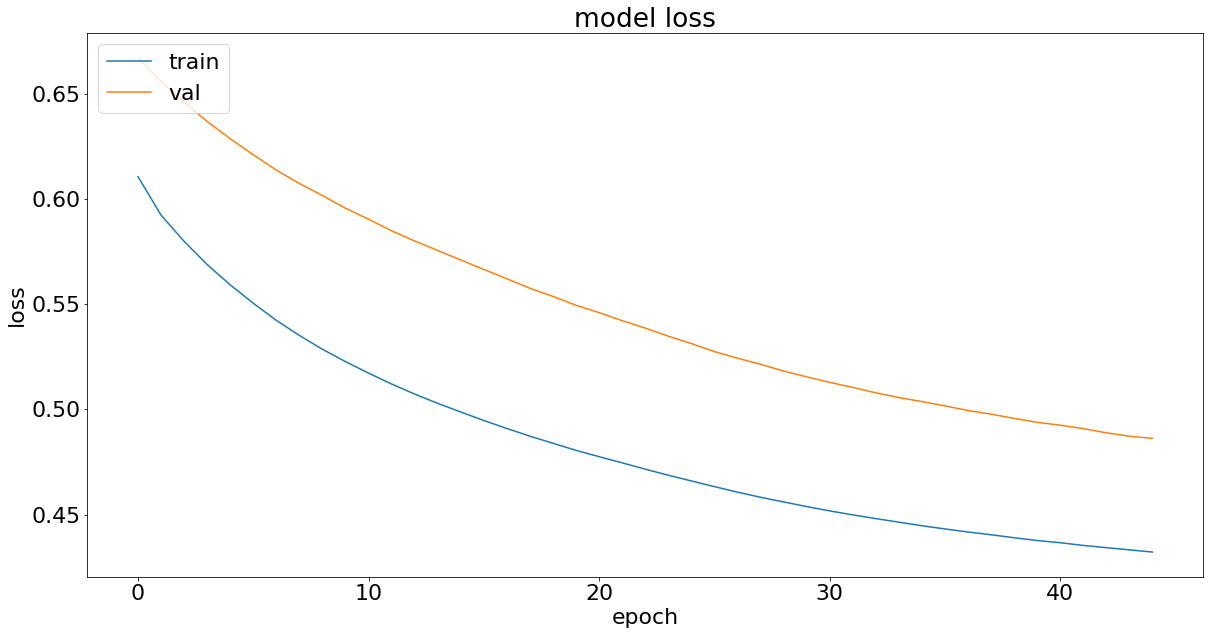

In [187]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':22})
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':22})
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

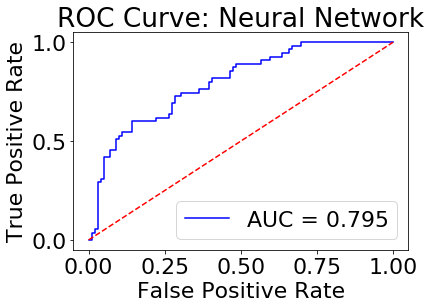

Neural Network test set accuracy:  0.7532467532467533


In [188]:
# prediction with test set
y_pred = model.predict(x_test_subset)
fpr, tpr, threshold = roc_curve(y_test_subset, y_pred)
#fpr, tpr, threshold = roc_curve(y_test_subset, y_pred[:,1])
#roc_auc = metrics.auc(fpr, tpr)

roc_auc = roc_auc_score(y_test_subset, y_pred)


plt.title('ROC Curve: Neural Network')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# for accuracy need to convert y_pred values to 0 or 1
def round(y):
    result = 0
    if y >= 0.5:
        result = 1
    return result

y_pred_rounded = [round(y_pred[i]) for i in range(len(y_pred))]
print('Neural Network test set accuracy: ', accuracy_score(y_test_subset, y_pred_rounded))

# 4. Summary and conclusion
| Model                        | Training set accuracy |Test set accuracy| AUC    |
| -----------------------------| --------------------- | ----------------|--------|
| LR                           |       0.773          |     0.753        |  0.723 |
| SVC                          |       0.771          |     0.753        |  0.723 |
| RidgeClassifier              |       0.767          |     0.772        |  0.738 |
| GradientBoostingClassifier   |       0.764          |     0.746        |  0.738 |
| Neural Network               |       0.793          |     0.753        |  0.795 |

As we can see from the table above, for this diabetes prediction problem, the various models have performed good but not great and that could be due to the fact that we are using a smaller dataset, ideally we would like to have a bigger dataset. Also it's possible that the dataset doesn't is not capturing all factors that can predict diabetes like genes, race of the people.

On comparing the models, we see a simple Neural network model gives the best performance especially the AUC metric is much better than other supervised learning methods. Additionally we can explore more by running grid search to improve the performance of other supervised learning methods as well and we can also trying building ensemble models that combine multiple models to get even better performance.

# References
1. Feature Engineering Made Easy book by Sinan Ozdemir, Divya Susarla